In [1]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
import torch
from pytorch3d.structures.pointclouds import Pointclouds
from pytorch3d.structures.meshes import Meshes

from geometry_constraint import construct_pointcloud, construct_mesh, geometry_constraint

Create some dummy points for testing

In [7]:
test_vtxs = torch.tensor([
    (0, 0, 0),
    (1, 0, 0),
    (0, 1, 0),
    (0, 0, 1),
], dtype=torch.float)
test_faces = torch.tensor([
    (0, 1, 2),
    (0, 2, 3),
])

# points that we want to be projected
test_points = torch.tensor([
    (0.5, 0.4, 0.5),
    (0.5, 0.6, 0.5),
], dtype=torch.float)

In [8]:
p_cloud = construct_pointcloud(test_points)
mesh_batch = construct_mesh(test_vtxs, test_faces)

In [9]:
projected_points = geometry_constraint(p_cloud, mesh_batch)

Plot the sample data

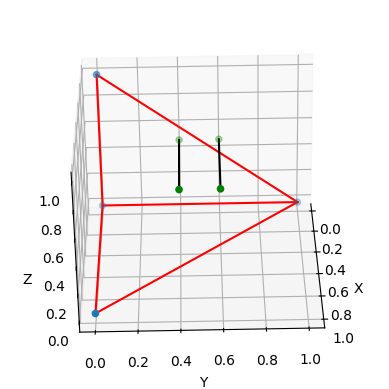

In [11]:
ax = plt.figure().add_subplot(projection='3d')
edges: torch.Tensor = mesh_batch.edges_packed()
vtxs: torch.Tensor = mesh_batch.verts_packed()
for p1_idx, p2_idx in edges:
    p1 = vtxs[p1_idx]
    p2 = vtxs[p2_idx]
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], zdir='z', color='r')

ax.scatter(vtxs[:, 0], vtxs[:, 1], vtxs[:, 2], zdir='z')

for point, projected_point in zip(test_points, projected_points):
    ax.scatter([point[0], projected_point[0]],
               [point[1], projected_point[1]],
               [point[2], projected_point[2]],
               zdir='z', color='g')
    ax.plot([point[0], projected_point[0]],
               [point[1], projected_point[1]],
               [point[2], projected_point[2]],
               zdir='z', color='k')

# Make legend, set axes limits and labels
# ax.legend()
# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1)
# ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=30., azim=-0, roll=1)

plt.show()